In [2]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as clr
from  sklearn.model_selection import train_test_split
# generate random floating point values
from random import seed
from random import random


In [3]:
#functions to generate data [X1,X2,C]
def f(x):
    return -x+5

#x1A=0, x2A=f(x1A)
#x1B=5, x2B=f(X1B)

def generateData(n):    
    seed(1)
    min=0
    max=5
    L=[]
    for _ in range(n):
        valueX1 = random()
        scaledvalueX1 = min + (valueX1 * (max - min))
        x1=round(scaledvalueX1,1)
        
        valueX2 = random()
        scaledvalueX2 = min + (valueX2 * (max - min))
        x2=round(scaledvalueX2,1)
        y0=f(x1)
        cl=0
        if(x2>y0):
            cl=1
        L.append([x1,x2,cl])
    return L

#generate data


In [4]:
data=generateData(120)
data=np.array(data)
#trainnin: 70%
#test: 30%

In [5]:
X1=data[:,0]
X2=data[:,1]
y=data[:,2]

In [6]:
X=[[X1[k],X2[k]] for k in range(len(X1))]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)

In [8]:
len(X_train),len(X_test)

(80, 40)

In [9]:
C=data[:,2]

In [10]:
type(X_train)

list

In [11]:
C

array([0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0.,
       0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0.,
       1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0.,
       0.])

In [12]:
X_train,X_test,y_train,y_test=np.array(X_train),np.array(X_test),np.array(y_train),np.array(y_test)

In [13]:
X_train[:,0]

array([2.5, 1.5, 1.6, 0.2, 0.5, 4.8, 4.2, 4.4, 3.6, 2.5, 2.8, 2.4, 1.1,
       0.8, 2.6, 4.2, 2.2, 2.9, 0.5, 0.8, 1.6, 2.5, 3.2, 1.9, 1.6, 1.1,
       0.1, 0.3, 3.3, 1.4, 2. , 0.7, 3.8, 0.8, 4.6, 3.5, 2.7, 0.3, 4. ,
       3.9, 1.1, 3.4, 4.8, 1.1, 4.3, 4.3, 4.3, 4. , 4.5, 0.9, 0.1, 1.9,
       3.8, 4. , 3.8, 3.4, 4.9, 4. , 4.3, 3.8, 2.5, 0.6, 2.5, 4.7, 4.9,
       1.5, 1.6, 2.4, 3. , 1.5, 2. , 0.4, 5. , 1.3, 2.1, 4.7, 2.2, 2.9,
       2.8, 1. ])

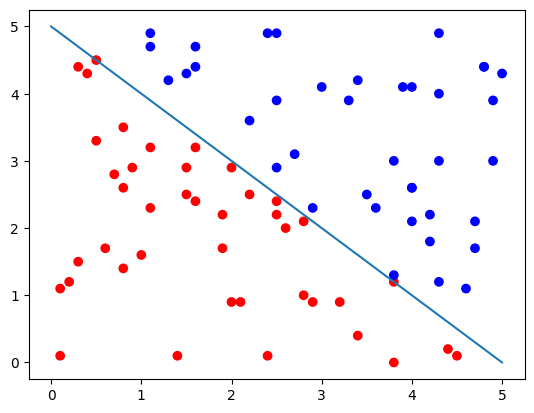

In [14]:

colors = ['red','blue']
plt.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap=clr.ListedColormap(colors))
X_AB=np.array([0,5])#deux abscisses xA,xB
plt.plot(X_AB,f(X_AB)) #tracer les deux points A(xA,f(xA)) et B(xB,f(xB))
#cette droite est connue
#l'objectif dans la suite est de trouver cette droite en appliquant l'algorithme de gradient descent 
#en se basant sur la technique Logistic Regression ou encore Neural Network- One Neurone
#Neural Network- One Neurone est applicable car le problème est linéarement séparable
plt.show()
    


In [15]:
#fonction qui permet d'identifier les individus mal classés par le modèle
def getErrors(C,predicted_classes):
    indexes=[]
    for k in range(len(C)):
        if C[k]!=predicted_classes[k]:
            indexes.append(k)
    return indexes

In [16]:
#cette fonction permet de trouver x2 en se basant sur les poids: (fonction d'une droite) ax+by+c=0 
#(ou pour notre cas: w1.x1+w2.x2+bias=0)
def getX2(x1,bias,w1,w2):
    return -(w1/w2)*x1-bias/w2

#fonction qui trace les points selon les préictions input(x1,x2)-->classe
def plot_Data_Line(X1,X2,C,predicted_class,bias,w1,w2):
    #---------------------points
    plt.figure(figsize=(5,3))
    colors = ['red','blue']
    plt.scatter(X1,X2,c=C,cmap=clr.ListedColormap(colors))
    
    errors_indexes=getErrors(C,predicted_class)
    
    plt.plot(X1[errors_indexes],X2[errors_indexes],"ko")
    
    
    #-----------------------------line
    x1_A=0
    x2_A=getX2(x1_A,bias,w1,w2)
    x1_B=5
    x2_B=getX2(x1_B,bias,w1,w2)
    
    plt.plot([x1_A,x1_B],[x2_A,x2_B],color="blue")
    #----------------------------------
    plt.show()
    
    
    

In [18]:
#Logistic regression by using sklearn

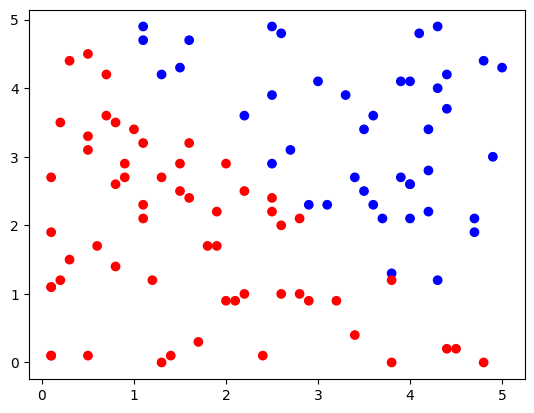

In [19]:
data=generateData(100)
data=np.array(data)
X1=data[:,0]
X2=data[:,1]
C=data[:,2]
colors = ['red','blue']
plt.scatter(X1,X2,c=C,cmap=clr.ListedColormap(colors))
plt.show()


In [20]:
from sklearn.linear_model import LogisticRegression


In [21]:
X=[[X1[k],X2[k]] for k in range(len(X1))]

In [22]:
X

[[0.7, 4.2],
 [3.8, 1.3],
 [2.5, 2.2],
 [3.3, 3.9],
 [0.5, 0.1],
 [4.2, 2.2],
 [3.8, 0.0],
 [2.2, 3.6],
 [1.1, 4.7],
 [4.5, 0.2],
 [0.1, 2.7],
 [4.7, 1.9],
 [1.1, 2.1],
 [0.1, 1.1],
 [2.2, 2.5],
 [1.2, 1.2],
 [1.1, 2.3],
 [1.4, 0.1],
 [4.2, 2.8],
 [3.2, 0.9],
 [5.0, 4.3],
 [0.6, 1.7],
 [3.6, 3.6],
 [4.7, 2.1],
 [4.2, 3.4],
 [1.5, 2.9],
 [4.4, 4.2],
 [2.5, 2.9],
 [0.2, 1.2],
 [4.0, 2.1],
 [0.9, 2.7],
 [3.5, 3.4],
 [1.9, 2.2],
 [2.5, 3.9],
 [2.6, 2.0],
 [2.4, 0.1],
 [0.2, 3.5],
 [4.9, 3.0],
 [2.0, 0.9],
 [2.5, 4.9],
 [3.9, 2.7],
 [4.3, 1.2],
 [2.6, 4.8],
 [2.9, 2.3],
 [1.3, 2.7],
 [4.8, 0.0],
 [3.9, 4.1],
 [4.4, 3.7],
 [4.0, 2.6],
 [2.8, 2.1],
 [0.3, 4.4],
 [2.8, 1.0],
 [2.5, 2.4],
 [1.8, 1.7],
 [2.7, 3.1],
 [3.1, 2.3],
 [0.1, 1.1],
 [0.9, 2.9],
 [4.3, 4.0],
 [4.0, 4.1],
 [1.3, 4.2],
 [3.4, 0.4],
 [0.1, 0.1],
 [3.8, 1.2],
 [0.5, 3.1],
 [1.7, 0.3],
 [0.8, 2.6],
 [0.8, 1.4],
 [3.6, 2.3],
 [1.6, 2.4],
 [0.1, 1.9],
 [2.1, 0.9],
 [0.5, 4.5],
 [2.6, 1.0],
 [3.0, 4.1],
 [0.1, 0.1],
 [0.7, 3.6],

In [23]:
C

array([0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0.,
       0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0.,
       1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0.])

<h3 style="color:Tomato;">I.1. Logistic Regression by using librairires</h3>


In [24]:
#data
X=np.array([[X1[k],X2[k]] for k in range(len(X1))])
model=LogisticRegression()

model.fit(X,C)

LogisticRegression()

In [25]:
model.intercept_,model.coef_

(array([-12.56171167]), array([[2.44160326, 2.35147425]]))

In [26]:
model.intercept_

array([-12.56171167])

In [27]:
model.coef_

array([[2.44160326, 2.35147425]])

In [28]:
yhat=model.predict(X)

In [29]:
yhat

array([0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0.,
       0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0.,
       1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0.])

In [30]:
model.coef_[0,0],model.coef_[0,1]

(2.4416032601624553, 2.351474250885593)

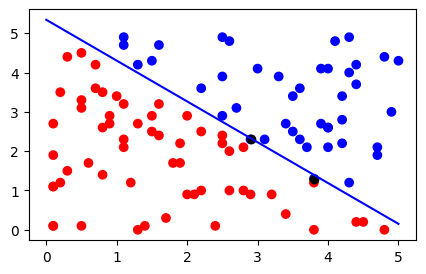

In [31]:
plot_Data_Line(X1,X2,C,yhat,model.intercept_[0],model.coef_[0,0],model.coef_[0,1])

<h3 style="color:Tomato;">I.2. Logistic Regression from scratch</h3>

<h3 style="color:Tomato;">questions</h3>
<p>
    <span style="color:Tomato;"><b> 1) </b></span>
    <span  style="color:DodgerBlue;">En reprenant les codes nécessaires du TP1, écrire le code la fonction fit(X,y) qui permet d'apprendre le modèle (droite) qui sépare entre les deux classes</span>
</p>
<p>
    <span style="color:Tomato;"><b> 2) </b></span>
    <span  style="color:DodgerBlue;">Modifier le code obtenu en 1) afin de montrer l'évolution du modèle voir (Algo-execution.docx)</span>
</p>



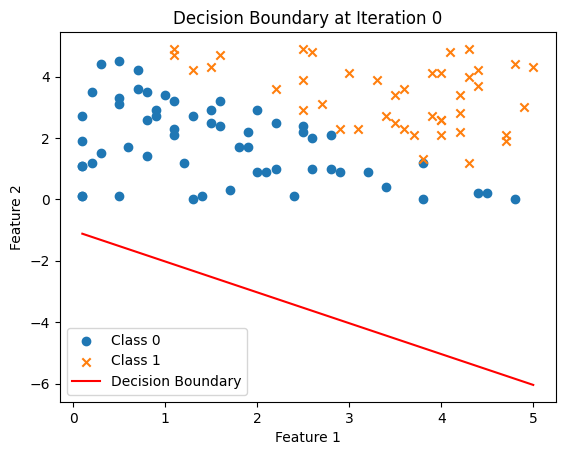

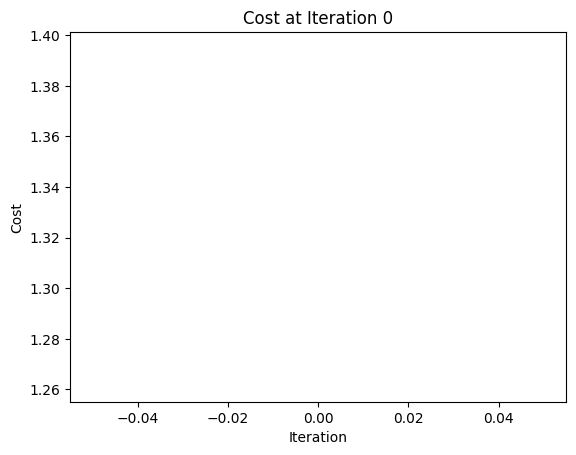

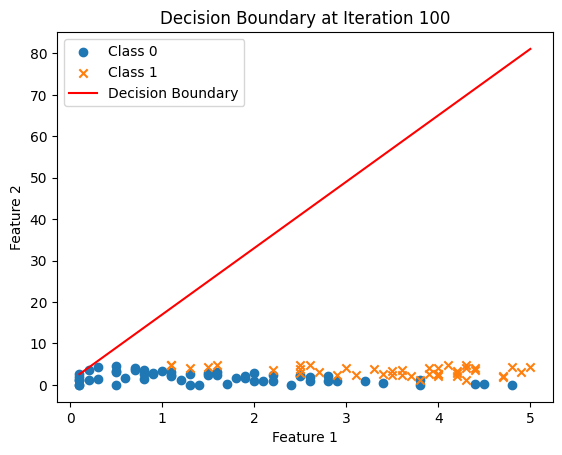

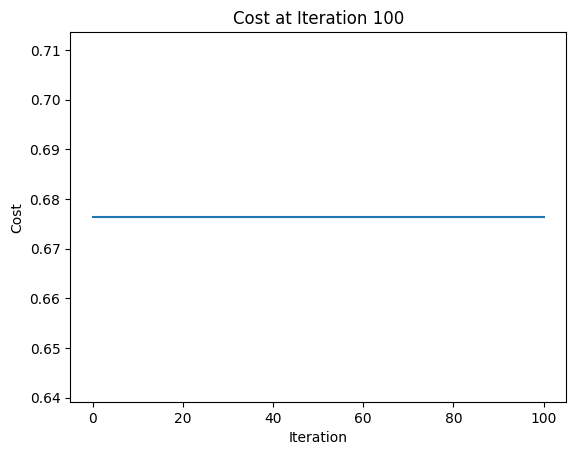

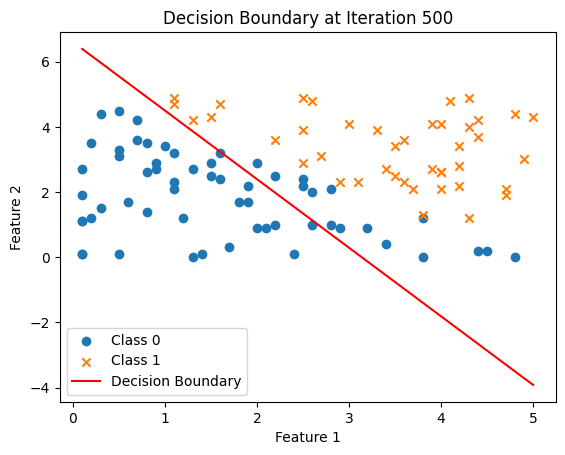

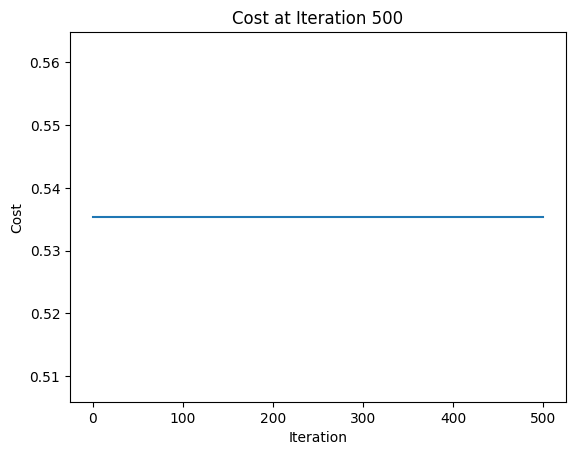

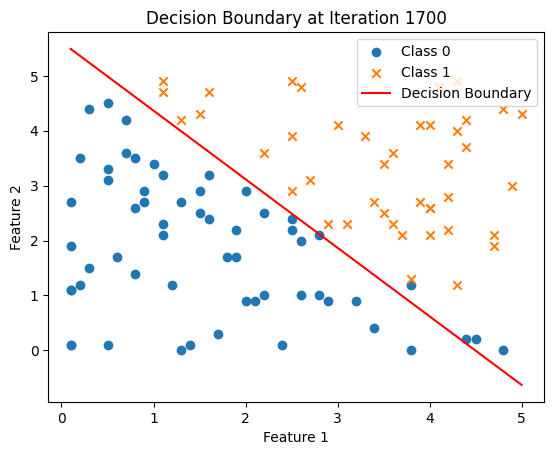

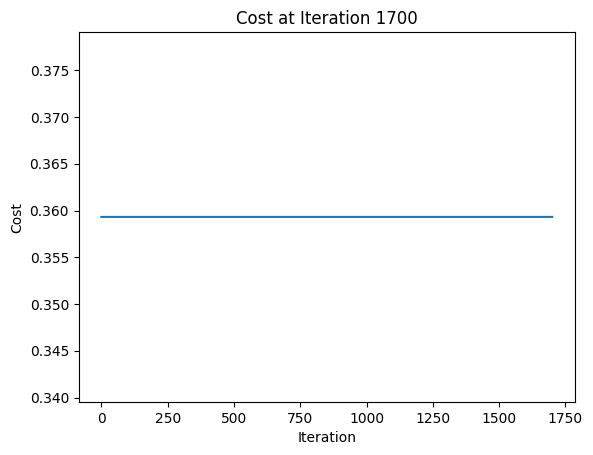

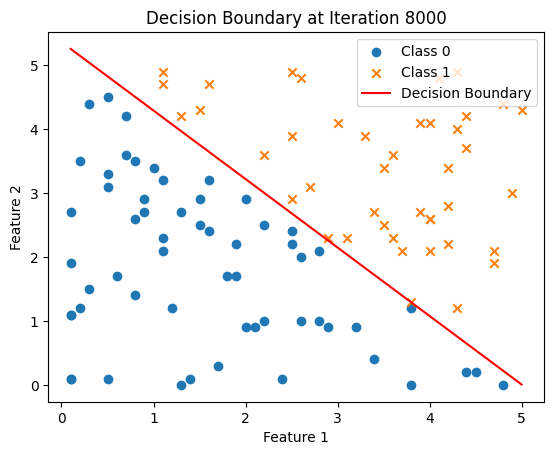

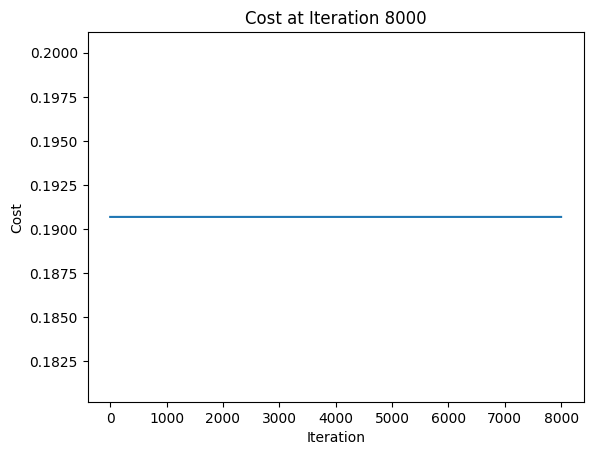

In [44]:
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boundary(X, y, bias, w1, w2):
    # Tracer le graphe
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label='Class 0', marker='o')
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label='Class 1', marker='x')

    # Ligne de Spération / Decision Boundary
    x_values = np.array([np.min(X[:, 0]), np.max(X[:, 0])])
    y_values = (-1/w2) * (bias + w1 * x_values)
    plt.plot(x_values, y_values, label='Decision Boundary', color='red')

    plt.xlabel('w1')
    plt.ylabel('w2')
    plt.legend()


from utils import *  

def sigmoid(Z):
    return 1 / (1 + np.exp(-Z))

def log_loss(y, yhat):
    epsilon = 1e-15
    yhat = np.maximum(epsilon, yhat)
    yhat = np.minimum(1 - epsilon, yhat)
    return - (y * np.log(yhat) + (1 - y) * np.log(1 - yhat)).mean()

def fit(X, y):
    lr = 0.01
    epochs = 100000
    n = len(y)
    w1 = 0.5
    w2 = 0.5
    bias = 0.5

    for k in range(epochs):
        ws = bias + w1 * X[:, 0] + w2 * X[:, 1]
        yhat = sigmoid(ws)

        cost = log_loss(y, yhat)

        dbias = -(2 / n) * np.sum(y - yhat)
        dw1 = -(2 / n) * np.sum(X[:, 0] * (y - yhat))
        dw2 = -(2 / n) * np.sum(X[:, 1] * (y - yhat))

        bias = bias - dbias * lr
        w1 = w1 - dw1 * lr
        w2 = w2 - dw2 * lr

        if k in [0, 100, 500, 1700, 8000]:
            plt.figure()
            plot_decision_boundary(X, y, bias, w1, w2)
            plt.title(f'Decision Boundary at Iteration {k}')

            plt.figure()
            plt.plot(range(k + 1), [log_loss(y, sigmoid(bias + w1 * X[:, 0] + w2 * X[:, 1])) for k in range(k + 1)])
            plt.xlabel('Iteration')
            plt.ylabel('Cost')
            plt.title(f'Cost at Iteration {k}')
            plt.show()

    return bias, w1, w2

bias, w1, w2 = fit(X, C)
